# Exploration Data Analysis pour explorer les modes de consomation 
### Par Alexandre Rocchi (pas toucher les loulous)



In [143]:
import pandas 
import ast
import matplotlib.pyplot as plt
import scipy
import seaborn as sb
import numpy as np


### Importation des Datasets et création de la table 

In [144]:

recipes = pandas.read_csv("../dataset/RAW_recipes.csv")
interactions = pandas.read_csv("../dataset/RAW_interactions.csv")

In [145]:
# Convertir les listes (considéré comme des strings, en liste python)

recipes['nutrition'] = recipes['nutrition'].apply(ast.literal_eval)

recipes['tags'] = recipes['tags'].apply(ast.literal_eval)

recipes['steps'] = recipes['steps'].apply(ast.literal_eval)

recipes['ingredients'] = recipes['ingredients'].apply(ast.literal_eval)


In [146]:
# Convertir les dates en 'datetype' python :
recipes['submitted'] = pandas.to_datetime(recipes['submitted'])

interactions['date'] = pandas.to_datetime(interactions['date'])

In [147]:
recipes.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13


In [148]:
interactions.head(3)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


In [149]:
print(recipes.columns)

print(interactions.columns)

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')


df = pandas.merge(recipes, interactions)

Travaillons sur une masse de données plus faible pour la prise en main des données et des différentes tables

In [150]:
df = pandas.merge(recipes, interactions, left_on='id', right_on='recipe_id')


In [151]:
df.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...


In [152]:

df_g = df.groupby(['recipe_id']).agg({
    'name':'first',
    'minutes':'first',
    'contributor_id':'first',
    'submitted':'first',
    'tags':'first',
    'nutrition':'first',
    'steps':'first',
    'n_steps':'first',
    'description':'first',
    'ingredients':'first',
    'n_ingredients':'first',
    'review': lambda x: list(x) if len(x) > 0 else [], 
    'date': lambda x: list(x) if len(x) > 0 else [],
    'user_id': lambda x: list(x) if len(x) > 0 else [],
    'rating': lambda x: list(x) if len(x) > 0 else []
}).reset_index()

print(df_g.head(1))


   recipe_id                               name  minutes  contributor_id  \
0         38  low fat berry blue frozen dessert     1485            1533   

   submitted                                               tags  \
0 1999-08-09  [weeknight, time-to-make, course, preparation,...   

                                  nutrition  \
0  [170.9, 3.0, 120.0, 1.0, 6.0, 6.0, 12.0]   

                                               steps  n_steps  \
0  [toss 2 cups berries with sugar, let stand for...       13   

                                         description  \
0  this is yummy and low-fat, it always turns out...   

                                         ingredients  n_ingredients  \
0  [blueberries, granulated sugar, vanilla yogurt...              4   

                                              review  \
0  [Yummy, yummy, yummy! I am a big fan of fruit ...   

                                                date  \
0  [2008-02-13 00:00:00, 2009-01-15 00:00:00, 201...   

    

In [153]:
df_g.dtypes

recipe_id                  int64
name                      object
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
tags                      object
nutrition                 object
steps                     object
n_steps                    int64
description               object
ingredients               object
n_ingredients              int64
review                    object
date                      object
user_id                   object
rating                    object
dtype: object

In [154]:
print("Nombre de valeurs manquantes :", df_g.isna().sum().sum())


Nombre de valeurs manquantes : 4980


visualisation les valeurs manquantes : 

Peut on remplacer la description manquante par le nom de la recette ? 

In [155]:
df_g[df_g['description'].isna() | (df_g['description'].str.strip() == '')].head(5)


,recipe_id,name,minutes,contributor_id,submitted,tags,nutrition,steps,n_steps,description,ingredients,n_ingredients,review,date,user_id,rating
7,48,boston cream pie,135,1545,1999-08-24,"[weeknight, time-to-make, course, main-ingredi...","[688.2, 56.0, 184.0, 30.0, 17.0, 64.0, 28.0]","[beat egg whites until soft peaks form, gradua...",32,None,"[margarine, cake flour, baking powder, salt, s...",15,[The flavor was great. But I think there was n...,"[2002-03-15 00:00:00, 2004-05-03 00:00:00]","[32421, 68674]","[0, 2]"
9,50,biscotti di prato,70,1752,1999-08-31,"[weeknight, time-to-make, course, cuisine, pre...","[89.4, 4.0, 29.0, 0.0, 4.0, 1.0, 4.0]","[egg wash 1 egg , large 1 tsp water in the bow...",7,None,"[flour, sugar, baking powder, salt, eggs, vani...",10,[This recipe is sooooo close to what you find ...,"[2004-12-15 00:00:00, 2009-03-22 00:00:00]","[10448, 1060485]","[5, 4]"
10,52,cafe cappuccino,5,2178,1999-08-31,"[15-minutes-or-less, time-to-make, course, cui...","[62.2, 0.0, 47.0, 1.0, 5.0, 0.0, 4.0]","[stir ingredients together, process in a blend...",4,None,"[instant coffee, sugar, nonfat dry milk solid,...",4,[I haven't made this in years. When the kids ...,[2004-08-02 00:00:00],[133174],[5]
11,53,jimmy g s carrot cake,110,1772,1999-09-08,"[weeknight, time-to-make, course, main-ingredi...","[372.9, 16.0, 163.0, 7.0, 13.0, 16.0, 22.0]",[grease and lightly flour 2 9x1 1 / 2-inch rou...,15,None,"[all-purpose flour, sugar, baking powder, baki...",13,[First Jimmy let me say that the taste was gre...,[2009-07-09 00:00:00],[557764],[3]
12,55,betty crocker s southwestern guacamole dip,125,1538,1999-09-15,"[weeknight, time-to-make, course, cuisine, pre...","[415.9, 56.0, 11.0, 12.0, 11.0, 26.0, 8.0]","[peel and mash avocados until lumpy, add remai...",2,None,"[avocados, tomatoes, salt, garlic, lime juice]",5,[I liked it. I was surprised since it didn't h...,"[2006-01-12 00:00:00, 2006-03-31 00:00:00, 200...","[53959, 165567, 1060485, 851190]","[4, 5, 5, 5]"


Remplacons donc chaque description manquante par le nom de la recette.

In [156]:
df_g['description'] = df_g['description'].fillna(df_g['name'])

print("Nombre de valeurs manquantes :", df_g.isna().sum().sum())


Nombre de valeurs manquantes : 1


In [157]:
df_g[df_g['name'].isna() | (df_g['name'].str.strip() == '')].head()

,recipe_id,name,minutes,contributor_id,submitted,tags,nutrition,steps,n_steps,description,ingredients,n_ingredients,review,date,user_id,rating
187044,368257,None,10,779451,2009-04-27,"[15-minutes-or-less, time-to-make, course, pre...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]","[in a bowl , combine ingredients except for ol...",6,-------------,"[lemon, honey, horseradish mustard, garlic clo...",10,[This was great! Thanx. It was the only one wi...,[2010-01-14 00:00:00],[353428],[0]


On trouve une recette avec aucun nom : 2 solutions, essayer de lui trouver un nom avec les ingredients et les etapes... OU la supprimer.

In [158]:
df_g = df_g.dropna(subset=['name'])

print("Nombre de valeurs manquantes :", df_g.isna().sum().sum())

Nombre de valeurs manquantes : 0


Listes des variables et leur type :

| recipe_id | minutes | contributor_id | submitted | tags | steps | n_steps | description | ingredients | n_ingredients | review | date | user_id | rating |
| :-------: | :-----: | :------------: | :-------: | :--: | :---: | :-----: | :---------: | :---------: | :-----------: | :----: | :--: | :-----: | :----: |
| qualitative nominale | quantitative discrete | qualitative nominale | quantitative continue | qualitative nominale | qualitative nominale | quantitative discrete | qualitative nominale | qualitative nominale | quantitative discrete | qualitative nominale | quantitative continue | qualitative nominale |  qualitative ordinale |

### Analyse Univariés

Commencons par l'analyse univariés de chaque variables, commencons par les variables de type Quantitatives discrete 

Les différentes colonnes Quantitatives discrète : *minutes, n_steps, n_ingredients*

In [159]:
df_g['contributor_id'] = df_g.contributor_id.astype('category')
df_g['recipe_id'] = df_g.recipe_id.astype('category')

In [160]:
print(df_g.describe())

print(f"\nNombre de recettes : ",df_g['recipe_id'].count())

            minutes                      submitted        n_steps  \
count  2.316360e+05                         231636  231636.000000   
mean   9.398587e+03  2006-11-14 01:53:01.122105344       9.765516   
min    0.000000e+00            1999-08-06 00:00:00       0.000000   
25%    2.000000e+01            2004-09-16 00:00:00       6.000000   
50%    4.000000e+01            2007-01-23 00:00:00       9.000000   
75%    6.500000e+01            2008-10-29 00:00:00      12.000000   
max    2.147484e+09            2018-12-04 00:00:00     145.000000   
std    4.461973e+06                            NaN       5.995136   

       n_ingredients  
count  231636.000000  
mean        9.051149  
min         1.000000  
25%         6.000000  
50%         9.000000  
75%        11.000000  
max        43.000000  
std         3.734803  

Nombre de recettes :  231636


##### Colonne : *minutes*

In [161]:
df_g  = df_g.sort_values('minutes',ascending=False)
df_g[['name','minutes']].head(5)


,name,minutes
141904,no bake granola balls,2147483647
213797,how to preserve a husband,1051200
155593,homemade fruit liquers,288000
120304,celtic druid s honey mead meade metheglin,259260
207668,homemade vanilla,259205


Les deux premières dates semblent etres des outlayers de recettes 'trolls' : nous les retirons donc du dataset. 

In [162]:
df_g = df_g.drop(df_g['minutes'].nlargest(2).index)

df_g[['name','minutes']].head(5)

,name,minutes
155593,homemade fruit liquers,288000
120304,celtic druid s honey mead meade metheglin,259260
207668,homemade vanilla,259205
57271,peach brandy,216015
40504,angelica liqueur,201610


In [163]:
df_g  = df_g.sort_values('minutes',ascending=True)
df_g[['name','minutes']].head(5)

,name,minutes
1302,cheese straws iv,0
2003,broccoli salad with oven roasted mushrooms,0
2006,low fat clam vegetable chowder,0
2018,penne with artichoke hearts,0
486,pig in the blankets,0


In [164]:

#idx = df_g.index[(df_g['minutes'] == df_g['minutes'].min())].tolist()
idx = df_g.index[df_g['minutes'] < 2].tolist()

df_g = df_g.drop(idx)


df_g[['name','minutes']].head(10)

,name,minutes
224724,angelina mexican shirley temple,2
204327,berry and mango smoothie,2
34700,creamsicle freeze,2
204326,melon apricot and mango smoothie,2
15613,gravin chicken,2
143392,slippery slide cocktail,2
79870,perfect hard boiled eggs technique,2
187445,tropical dream,2
187416,green apple and beet salad,2
141435,happily ever after cocktail,2


In [165]:
df_g.describe()

,minutes,submitted,n_steps,n_ingredients
count,229998.000000,229998,229998.000000,229998.000000
mean,123.981961,2006-11-25 11:28:16.929538560,9.777868,9.063244
min,2.000000,1999-08-06 00:00:00,0.000000,1.000000
25%,20.000000,2004-10-05 00:00:00,6.000000,6.000000
50%,40.000000,2007-01-30 00:00:00,9.000000,9.000000
75%,65.000000,2008-11-02 00:00:00,12.000000,11.000000
max,288000.000000,2018-12-04 00:00:00,145.000000,43.000000
std,1984.766573,NaN,5.990560,3.730821


In [218]:
print(f"nombre de recette prenant 0 minutes à etre réalisées : ",df_g.loc[df_g['minutes'] == df_g['minutes'].min()].shape[0])

nombre de recette prenant 0 minutes à etre réalisées :  1888


Tentons de representer la distributions des minutes dans un Violin Plot

Text(0, 0.5, 'Log minutes')

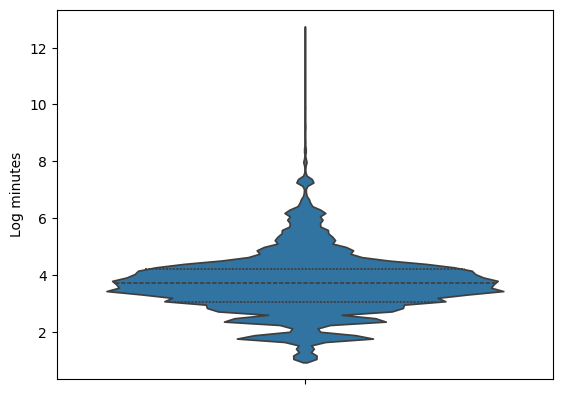

In [166]:
plt.figure()
sb.violinplot(np.log(1+df_g['minutes']),inner='quartile')
plt.ylabel('Log minutes')

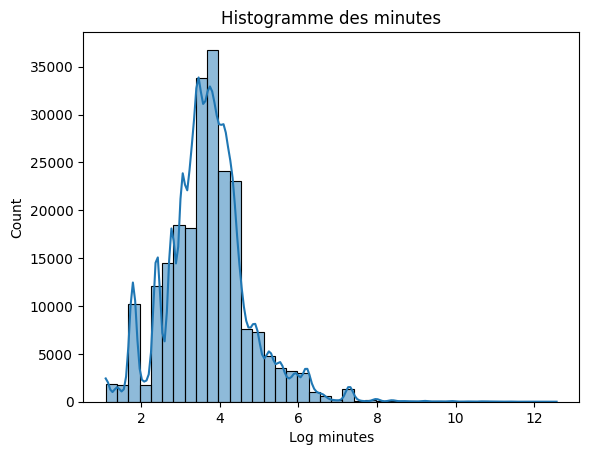

In [167]:
plt.figure()
sb.histplot(np.log(1+df_g['minutes']), kde=True, bins=40)
plt.title("Histogramme des minutes")
plt.xlabel('Log minutes')
plt.show()


In [168]:
skewness_minutes = scipy.stats.skew(df_g['minutes'])
kurt_minutes = scipy.stats.kurtosis(df_g['minutes'])

print(f'Skewness: {skewness_minutes}')
print(f'Kurtosis: {kurt_minutes}')


Skewness: 77.75366278319507
Kurtosis: 7830.41652058054


On retrouve une skewness et un Kurtosis elevé mais ceci est du a la présence d'outliers important. 

Skewness > 0 : La distribution est asymétrique avec une masse importante à gauche
Kurtnosis > 3 : Valeurs très proche de la moyenne mais des outliers important

Doit on les retirés et donc pas considèré les modes sur les alcools ? 

##### Colonne : *n_steps*

Verifier les valeurs max :

In [169]:
df_g  = df_g.sort_values('n_steps',ascending=False)
df_g[['name','n_steps','steps']].head(10)

,name,n_steps,steps
90562,easy yeast bread with variations,145,"[white bread:, lightly spooning flour into mea..."
108600,chocolate raspberry mousse truffle cake rasp...,113,"[make the chocolate sour cream cake:, preheat ..."
89963,chocolate raspberry ruffle cake,110,[first of all: these are not typical direction...
37274,5 cheese crab lasagna with roasted garlic and ...,108,[roast garlic: place oven rack on second notch...
182584,death by chocolate a la trellis,100,"[take a deep breath, make sure that you will h..."
231622,vampire s kiss cake,98,"[make your batter, preheat your oven to 350c p..."
114718,universal muffins mix,97,"[combine ingredients and break up any lumps, s..."
215548,best authentic mexican tamales ever,93,"[cook and shred pork roast:, start with 1 pork..."
37493,carioca,90,[for the genoise: preheat the oven to 350 degr...
194538,kielbasa homemade kielbasa fresh polish sausage,88,[put the garlic through a garlic press or minc...


In [170]:
df_g['steps'].iloc[0]

['white bread:',
 'lightly spooning flour into measuring cup & leveling off , measure out 2 1 / 2 cups flour',
 'combine flour , dry yeast , sugar , & salt in a large mixer bowl',
 'blend',
 'in a medium saucepan , combine water , milk , and oil',
 'heat until very warm',
 'add eggs and liquid to flour mixture',
 'mixing - blend at low speed until moistened',
 'beat 3 minutes at medium speed',
 'with a wooden spoon , stir in an additional 3 to 3-1 / 2 cups of flour to form a sticky dough',
 'in bowl or on a floured board , gradually work in 1 / 2 to 1-1 / 2 cups more flour , kneading or working in with hands until dough is smooth , pliable and no longer sticky',
 'rising - place dough in a greased bowl',
 'cover with a cloth or loose fit lid',
 'let rise in a warm place until light and double in size , about 45 minutes',
 'shaping & baking:punch down dough to remove air bubbles',
 'divide dough into two parts',
 'from dough into desired shapes',
 'place in greased pans according to sha

Verifier les valeurs min : 

In [171]:
df_g  = df_g.sort_values('n_steps',ascending=True)
df_g[['name','n_steps','steps']].head(10)

,name,n_steps,steps
100335,all season bread,0,[]
214888,tahini substitution,1,[mix well]
225625,gingerbread spice blend,1,[stir spices together and store in airtight co...
85841,martinelli s mimosa,1,"[sugar the rim of a champagne glass , pour ing..."
18302,roasted turkey and cranberry chutney sandwich,1,"[mix turkey , cream cheese and chutney and pla..."
9552,italian popcorn,1,"[melt the butter and stir in the seasonings , ..."
221488,lemon honey vinaigrette,1,[mix all ingredients in a small bowl or jar]
217406,carrot cucumber and celery juice refresher for...,1,[wash and cut each vegetable and feed through ...
220229,comeback sauce,1,[mix all the ingredients and store in refriger...
170912,bbq beans cowboy beans,1,[combine and cook for one hour at 350 degrees]


In [172]:
df_g = df_g.drop(df_g['n_steps'].idxmax())
df_g[['name','n_steps','steps']].head(10)

,name,n_steps,steps
100335,all season bread,0,[]
214888,tahini substitution,1,[mix well]
225625,gingerbread spice blend,1,[stir spices together and store in airtight co...
85841,martinelli s mimosa,1,"[sugar the rim of a champagne glass , pour ing..."
18302,roasted turkey and cranberry chutney sandwich,1,"[mix turkey , cream cheese and chutney and pla..."
9552,italian popcorn,1,"[melt the butter and stir in the seasonings , ..."
221488,lemon honey vinaigrette,1,[mix all ingredients in a small bowl or jar]
217406,carrot cucumber and celery juice refresher for...,1,[wash and cut each vegetable and feed through ...
220229,comeback sauce,1,[mix all the ingredients and store in refriger...
170912,bbq beans cowboy beans,1,[combine and cook for one hour at 350 degrees]


Après analyse des steps de la valeur maximale, il n'y a pas de raison de retirés la recette et de la considèrés comme une valeure aberrantes 

In [173]:
df_g  = df_g.sort_values('n_steps',ascending=True)
df_g[['name','n_steps','steps']].head(5)

,name,n_steps,steps
100335,all season bread,0,[]
48831,mediterranean cheese spread,1,"[combine all ingredients , cover and chill at ..."
149839,grannydragon s green bean feta salad,1,[mix all ingredients together and enjoy]
166884,spice and herb marinade,1,[whisk all ingredients together in small bowl]
198578,chimichuri sauce,1,[blend ingredients and done !]


In [174]:

df_g = df_g.drop(df_g['steps'].idxmin())

df_g[['name','n_steps','steps']].head(5)

,name,n_steps,steps
48831,mediterranean cheese spread,1,"[combine all ingredients , cover and chill at ..."
149839,grannydragon s green bean feta salad,1,[mix all ingredients together and enjoy]
166884,spice and herb marinade,1,[whisk all ingredients together in small bowl]
198578,chimichuri sauce,1,[blend ingredients and done !]
153832,bonedust seasoning,1,[mix and store in jar]


Text(0, 0.5, 'Steps')

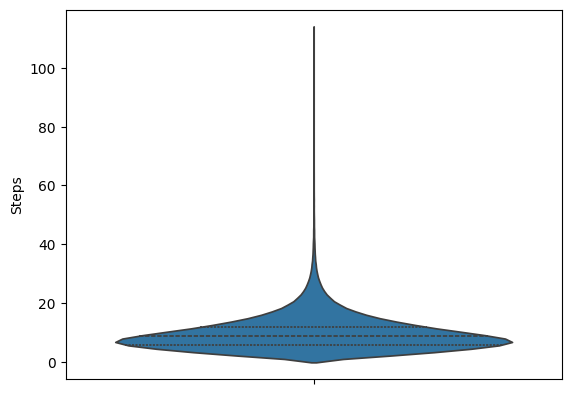

In [175]:
plt.figure()
sb.violinplot(df_g['n_steps'],inner='quartile')
plt.ylabel('Steps')

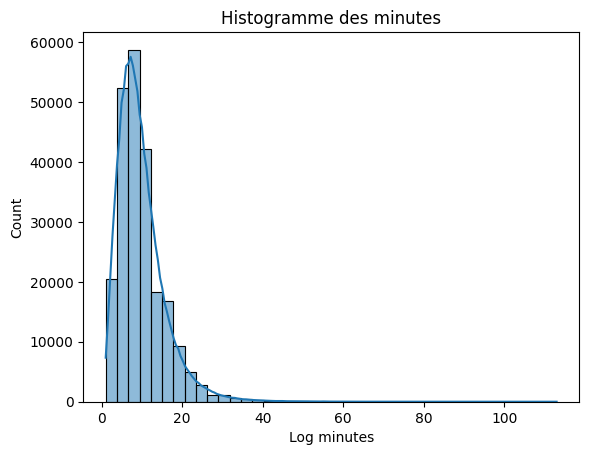

In [176]:
plt.figure()
sb.histplot(df_g['n_steps'], kde=True, bins=40)
plt.title("Histogramme des minutes")
plt.xlabel('Log minutes')
plt.show()


In [177]:
skewness_minutes = scipy.stats.skew(df_g['n_steps'])
kurt_minutes = scipy.stats.kurtosis(df_g['n_steps'])

print(f'Skewness: {skewness_minutes}')
print(f'Kurtosis: {kurt_minutes}')

Skewness: 1.9925362028814684
Kurtosis: 9.652143142631697


Toujours une présences d'outliers qui augmente les valeurs de skewness et kurtosis

Skewness > 0 : La distribution est asymétrique avec une masse importante à gauche

Kurtnosis > 3 : Valeurs très proche de la moyenne mais des outliers important

##### Colonne : *n_ingredients*

In [178]:
df_g  = df_g.sort_values('n_ingredients',ascending=False)
df_g[['name','n_ingredients','ingredients']].head(10)

,name,n_ingredients,ingredients
1272,a to z bread,43,"[sugar, vegetable oil, eggs, vanilla extract, ..."
140295,morton thompson turkey,40,"[whole turkey, canola oil, salt, fresh ground ..."
129591,z best two faced jerk,40,"[chicken breasts, fresh lime juice, salt, pepp..."
66233,kato s garage style tomato sauce meatba...,39,"[sweet onion, garlic cloves, green pepper, red..."
135862,basic fried rice with variations,38,"[brown rice, green onions, oil, soy sauce, sal..."
67952,land and sea white meat version of surf and turf,37,"[apricot, nectarine, red pepper, jalapeno, gar..."
227651,sunday supper taco salad bowls tacos,37,"[flour tortillas, ground beef, vegetable oil, ..."
28276,dhansak with brown rice,36,"[tuvar dal, masoor dal, yellow moong dal, dal,..."
103690,bill s calzones,35,"[tomato sauce, onions, garlic cloves, mushroom..."
4837,hillbilly bean soup,35,"[7 bean mix, water, ham bone, bay leaf, hot ch..."


In [179]:
df_g['ingredients'].iloc[0]


['sugar',
 'vegetable oil',
 'eggs',
 'vanilla extract',
 'all-purpose flour',
 'cinnamon',
 'baking powder',
 'baking soda',
 'salt',
 'walnuts',
 'apples',
 'applesauce',
 'apricots',
 'bananas',
 'carrots',
 'cherries',
 'fresh coconut',
 'dates',
 'eggplants',
 'figs',
 'seedless grapes',
 'honey',
 'lemon juice',
 'marmalade',
 'mincemeat',
 'oranges',
 'peaches',
 'of fresh mint',
 'pears',
 'crushed pineapple',
 'prune',
 'canned pumpkin',
 'raisins',
 'raspberries',
 'rhubarb',
 'fresh strawberries',
 'frozen strawberries',
 'sweet potatoes',
 'tapioca',
 'tomatoes',
 'yams',
 'yogurt',
 'zucchini']

In [180]:
df_g['steps'].iloc[0]

['in a mixing bowl , combine the sugar , oil and eggs',
 'mix well',
 'stir in a-to-z ingredients of your choice and vanilla',
 'combine flour cinnamon , baking powder , baking soda and salt',
 'stir into liquid ingredients just until moistened',
 'stir in nuts',
 'pour into two greased 8-in',
 'x 4-in',
 'x 2-in',
 'loaf pans',
 'bake at 325 f for 55-65 minutes or until a wooden pick inserted near the center comes out clean',
 'cool in pan 10 minutes before removing to a wire rack']

Il y un nombre très important d'ingrédients car la recette propose de mettre "ce qu'on veut" dans le pain préparer.
_Valeur aberrante ?_

In [181]:
df_g['steps'].iloc[1]

['preheat oven to 500f',
 'chop fine the reserved turkey fat',
 'in a small saucepan set over moderate heat , combine the reserved fat with 1 / 2 cup of the water',
 'bring to a boil and simmer until all the water has evaporated and only clear fat and small pieces of solid remain',
 'reserve fat for stuffing',
 'season the inside of the turkey with salt and pepper',
 'rub the skin all over with the oil and season with salt and pepper',
 'prepare the giblets for the basting liquid',
 'bring to a boil and simmer the entire time you for basting',
 'add more water as needed',
 'meat mixture: melt butter & brown veal , pork',
 'cool and add to bread crumbs , combine >',
 'make the dressing:',
 'prep bowl of fruits : combine all ingredients',
 'prep bowl of seasonings : combine all ingredients',
 'prep bowl of breadcrumbs and cooked meat mixture',
 'in a very large bowl combine ingredients from all three bowls listed above',
 'mix it well',
 'loosely stuff the turkey',
 'stuff the neck cavit

Semble plus cohérent entre le nombre d'ingrédients et les étapes.

In [182]:
df_g = df_g.drop(df_g['n_steps'].idxmax())

In [183]:
df_g  = df_g.sort_values('n_ingredients',ascending=True)
df_g[['name','n_ingredients','ingredients']].head(10)

,name,n_ingredients,ingredients
182017,super easy baking bacon,1,[bacon]
128875,easy granita,1,[red seedless grapes]
12934,melba toast,1,[white bread]
207501,chocolate dirt,1,[dark chocolate chips]
22350,proper melba toast,1,[white bread]
189452,super easy baking sausage,1,[breakfast sausage links]
77869,healthy salt substitute,1,[celery]
230741,apple cider reduction,1,[apple cider]
230265,how to choose and cut a mango,1,[mango]
158489,magic bullet powdered sugar,1,[sugar]


Text(0, 0.5, 'Ingredients')

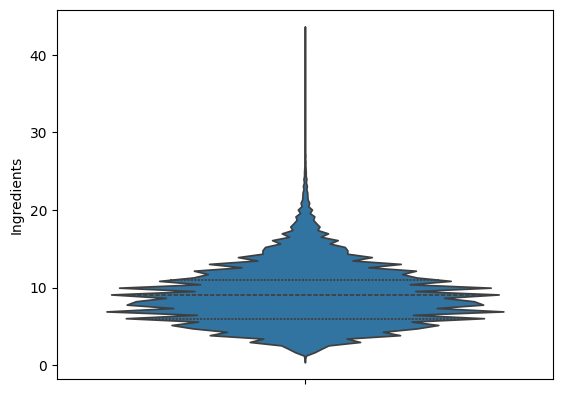

In [184]:
plt.figure()
sb.violinplot(df_g['n_ingredients'],inner='quartile')
plt.ylabel('Ingredients')

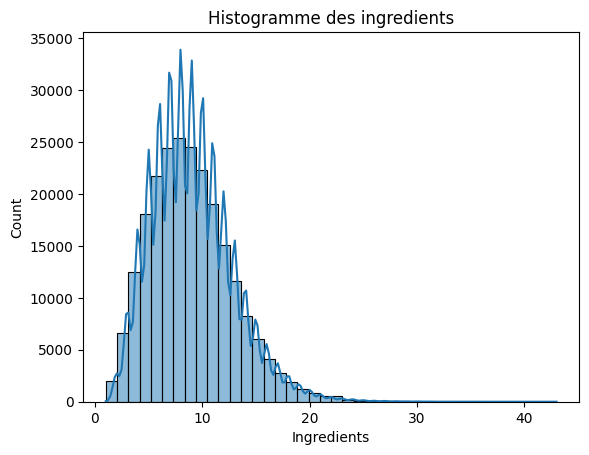

In [185]:
plt.figure()
sb.histplot(df_g['n_ingredients'], kde=True, bins=40)
plt.title("Histogramme des ingredients")
plt.xlabel('Ingredients')
plt.show()

In [186]:
skewness_minutes = scipy.stats.skew(df_g['n_ingredients'])
kurt_minutes = scipy.stats.kurtosis(df_g['n_ingredients'])

print(f'Skewness: {skewness_minutes}')
print(f'Kurtosis: {kurt_minutes}')

Skewness: 0.7709227207720828
Kurtosis: 1.1853038670428058


### Analyse de Submitted et de Date

In [187]:
df_g.head()

,recipe_id,name,minutes,contributor_id,submitted,tags,nutrition,steps,n_steps,description,ingredients,n_ingredients,review,date,user_id,rating
182017,355130,super easy baking bacon,95,804550,2009-02-10,"[bacon, time-to-make, course, main-ingredient,...","[1038.7, 157.0, 0.0, 78.0, 52.0, 170.0, 0.0]","[preheat oven to 400 degrees f, line a 10""x15""...",10,my daughter taught me to cook bacon with no sp...,[bacon],1,[This is a super method to cook bacon. So eas...,"[2009-03-29 00:00:00, 2009-07-05 00:00:00, 200...","[383346, 387912, 1072593, 25177, 210117, 13317...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5]"
128875,233253,easy granita,5,226066,2007-06-07,"[15-minutes-or-less, time-to-make, main-ingred...","[55.2, 0.0, 49.0, 0.0, 1.0, 0.0, 4.0]",[place the grapes or strawberries in the freez...,4,from weight watchers website.,[red seedless grapes],1,[What a cool treat! I used strawberries this t...,"[2007-06-20 00:00:00, 2007-06-26 00:00:00]","[83093, 25455]","[5, 4]"
12934,24802,melba toast,15,23302,2002-04-09,"[15-minutes-or-less, time-to-make, course, mai...","[133.0, 2.0, 8.0, 10.0, 7.0, 1.0, 8.0]",[preheat the broiler to high and toast the bre...,5,homemade melba toast has the edge on the bough...,[white bread],1,"[My husband made this years ago, he had gotten...","[2005-12-31 00:00:00, 2011-12-14 00:00:00]","[53002, 1026228]","[5, 5]"
207501,425260,chocolate dirt,5,730126,2010-05-13,"[15-minutes-or-less, time-to-make, course, pre...","[201.2, 19.0, 91.0, 0.0, 3.0, 37.0, 8.0]","[place chips in a coffee grinder, grind until ...",3,"this chocolate ""dirt"" is perfect for dusting c...",[dark chocolate chips],1,[I do this a lot with milk chocolate when maki...,[2010-07-28 00:00:00],[513230],[5]
22350,40247,proper melba toast,20,52448,2002-09-15,"[30-minutes-or-less, time-to-make, course, pre...","[33.2, 0.0, 2.0, 2.0, 1.0, 0.0, 2.0]","[toast the bread slices on both sides , under ...",8,this is easy and well worth the effort. serve ...,[white bread],1,[I did a lot of experimentation with this reci...,"[2003-05-05 00:00:00, 2003-07-28 00:00:00, 200...","[48136, 52282, 68715, 281871, 551498, 226462]","[5, 5, 5, 5, 5, 5]"


In [188]:
df_g['year'] = df_g['submitted'].dt.year
df_g['month'] = df_g['submitted'].dt.month
df_g['day'] = df_g['submitted'].dt.day
df_g['day_of_week'] = df_g['submitted'].dt.day_name()


In [189]:
df_g.head()

,recipe_id,name,minutes,contributor_id,submitted,tags,nutrition,steps,n_steps,description,ingredients,n_ingredients,review,date,user_id,rating,year,month,day,day_of_week
182017,355130,super easy baking bacon,95,804550,2009-02-10,"[bacon, time-to-make, course, main-ingredient,...","[1038.7, 157.0, 0.0, 78.0, 52.0, 170.0, 0.0]","[preheat oven to 400 degrees f, line a 10""x15""...",10,my daughter taught me to cook bacon with no sp...,[bacon],1,[This is a super method to cook bacon. So eas...,"[2009-03-29 00:00:00, 2009-07-05 00:00:00, 200...","[383346, 387912, 1072593, 25177, 210117, 13317...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5]",2009,2,10,Tuesday
128875,233253,easy granita,5,226066,2007-06-07,"[15-minutes-or-less, time-to-make, main-ingred...","[55.2, 0.0, 49.0, 0.0, 1.0, 0.0, 4.0]",[place the grapes or strawberries in the freez...,4,from weight watchers website.,[red seedless grapes],1,[What a cool treat! I used strawberries this t...,"[2007-06-20 00:00:00, 2007-06-26 00:00:00]","[83093, 25455]","[5, 4]",2007,6,7,Thursday
12934,24802,melba toast,15,23302,2002-04-09,"[15-minutes-or-less, time-to-make, course, mai...","[133.0, 2.0, 8.0, 10.0, 7.0, 1.0, 8.0]",[preheat the broiler to high and toast the bre...,5,homemade melba toast has the edge on the bough...,[white bread],1,"[My husband made this years ago, he had gotten...","[2005-12-31 00:00:00, 2011-12-14 00:00:00]","[53002, 1026228]","[5, 5]",2002,4,9,Tuesday
207501,425260,chocolate dirt,5,730126,2010-05-13,"[15-minutes-or-less, time-to-make, course, pre...","[201.2, 19.0, 91.0, 0.0, 3.0, 37.0, 8.0]","[place chips in a coffee grinder, grind until ...",3,"this chocolate ""dirt"" is perfect for dusting c...",[dark chocolate chips],1,[I do this a lot with milk chocolate when maki...,[2010-07-28 00:00:00],[513230],[5],2010,5,13,Thursday
22350,40247,proper melba toast,20,52448,2002-09-15,"[30-minutes-or-less, time-to-make, course, pre...","[33.2, 0.0, 2.0, 2.0, 1.0, 0.0, 2.0]","[toast the bread slices on both sides , under ...",8,this is easy and well worth the effort. serve ...,[white bread],1,[I did a lot of experimentation with this reci...,"[2003-05-05 00:00:00, 2003-07-28 00:00:00, 200...","[48136, 52282, 68715, 281871, 551498, 226462]","[5, 5, 5, 5, 5, 5]",2002,9,15,Sunday


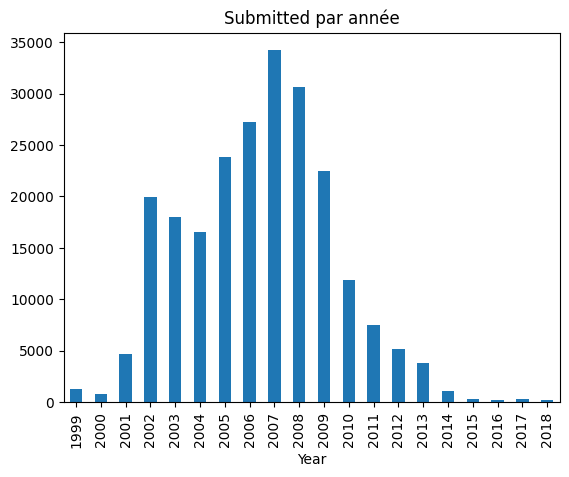

In [190]:

submissions_per_year = df_g['year'].value_counts().sort_index()

submissions_per_year.plot(kind='bar', title='Submitted par année')
plt.xlabel('Year')
plt.show()


In [191]:
skewness_years = scipy.stats.skew(df_g['year'])
kurt_years = scipy.stats.kurtosis(df_g['year'])

print(f'Skewness: {skewness_years}')
print(f'Kurtosis: {kurt_years}')

Skewness: 0.16580760694089877
Kurtosis: -0.05095614915638613


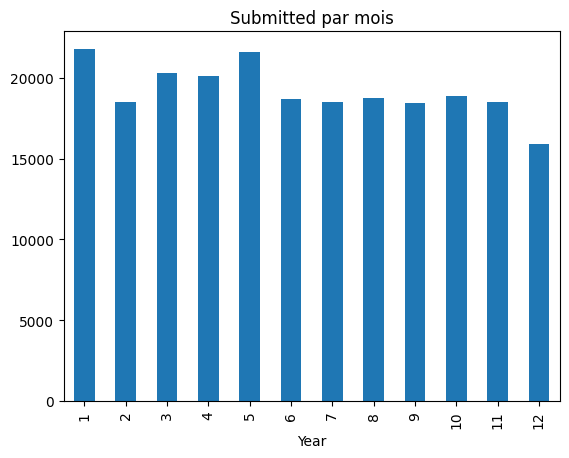

In [192]:

submissions_per_month = df_g['month'].value_counts().sort_index()

submissions_per_month.plot(kind='bar', title='Submitted par mois')
plt.xlabel('Year')
plt.show()

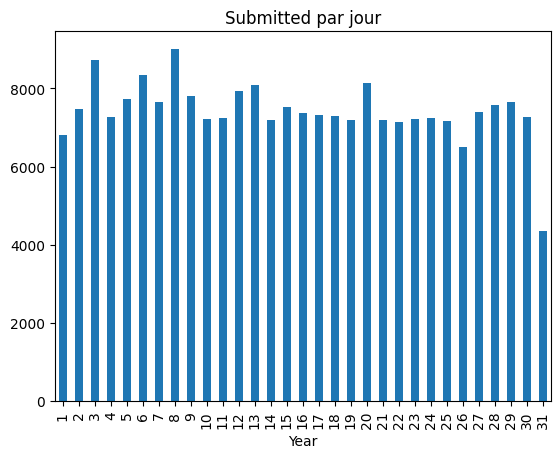

In [193]:

submissions_per_day = df_g['day'].value_counts().sort_index()

submissions_per_day.plot(kind='bar', title='Submitted par jour')
plt.xlabel('Year')
plt.show()

In [194]:
df_g.describe()

,minutes,submitted,n_steps,n_ingredients,year,month,day
count,229995.000000,229995,229995.000000,229995.000000,229995.000000,229995.000000,229995.000000
mean,123.981230,2006-11-25 11:31:01.631774720,9.776873,9.063171,2006.419983,6.301350,15.576699
min,2.000000,1999-08-06 00:00:00,1.000000,1.000000,1999.000000,1.000000,1.000000
25%,20.000000,2004-10-05 00:00:00,6.000000,6.000000,2004.000000,3.000000,8.000000
50%,40.000000,2007-01-30 00:00:00,9.000000,9.000000,2007.000000,6.000000,15.000000
75%,65.000000,2008-11-02 00:00:00,12.000000,11.000000,2008.000000,9.000000,23.000000
max,288000.000000,2018-12-04 00:00:00,110.000000,43.000000,2018.000000,12.000000,31.000000
std,1984.779493,NaN,5.980052,3.730710,2.966021,3.427133,8.822021


Les valeurs des jours sont bien comprise entre 1 et 31, les mois entre 1 et 12. Cela est donc correct, il n'y a rien a changer.

On observe une periode de forte activité pour le site puis une décroissance élevé : axe interessant d'analyse. On observe bien la tendance et la mode de consomation. 

#### Colone : *date*

In [195]:

df_g['n_comments'] = df_g['review'].apply(len)

df_g = df_g.sort_values(by='n_comments', ascending=False)

print(df_g[['name', 'n_comments','date']].head())


                                                    name  n_comments  \
833                                    best banana bread        1613   
14424                         to die for crock pot roast        1601   
51312  crock pot chicken with black beans   cream cheese        1579   
21639                         creamy cajun chicken pasta        1448   
38631   best ever banana cake with cream cheese frosting        1322   

                                                    date  
833    [2018-01-18 00:00:00, 2017-06-23 00:00:00, 201...  
14424  [2004-10-25 00:00:00, 2005-02-23 00:00:00, 200...  
51312  [2004-04-20 00:00:00, 2004-04-21 00:00:00, 200...  
21639  [2010-01-19 00:00:00, 2018-10-17 00:00:00, 200...  
38631  [2003-08-16 00:00:00, 2003-09-01 00:00:00, 200...  


Text(0, 0.5, 'n_comments')

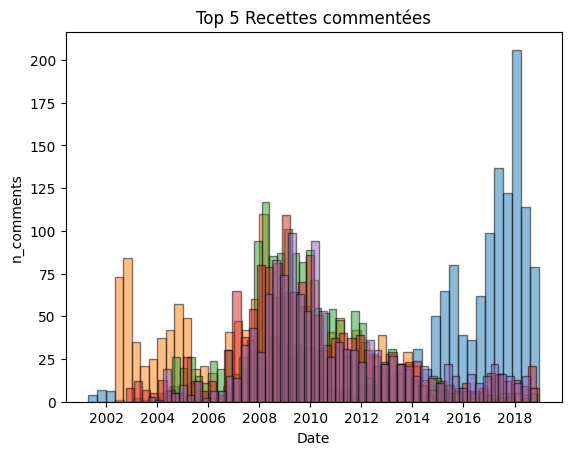

In [196]:
n_largest = df_g.nlargest(5, 'n_comments')
for i in range(len(n_largest)):
    plt.hist(df_g.loc[n_largest.index[i]]['date'], bins=50, edgecolor='black', alpha=0.5)

plt.title('Top 5 Recettes commentées')
plt.xlabel('Date')
plt.ylabel('n_comments')

En affichant les dates des commentaires des 5 recettes les plus commenté du site (ci dessus), on remarque bien que les commentaires suivent majoritairement la période d'activité du site (pic vers 2007-2008)

Pourquoi y a t-il eu un pic de commentaire pour le banana bread en 2018 ?

In [197]:

pandas.DataFrame({'date': pandas.to_datetime(df_g.loc[df_g['n_comments'].idxmax()]['date']), 'review': df_g.loc[df_g['n_comments'].idxmax()]['review']}).sort_values(by='date',ascending=False)['review'].head(10)



1612    I've been using this recipe for 2 years and it...
1611    Funny, &quot;Remove odd pots and pans from ove...
1610    Best banana bread recipe I have ever made, and...
1609    Very yummy. I added a little cinnamon to it as...
1608    I made this recipe today however I did some mi...
1607    My kids said this was the BEST banana bread I'...
1606    Wonderful Banana Bread! I've made it several t...
1605    Oh my goodness is this ever good! So easy to m...
1604    Delicious exactly as written... no tweaking ne...
1603    So amazing! This perfectly yielded 12 banana m...
Name: review, dtype: object

Cette recette devait etre beaucoup mise en avant par le site. Pourquoi ?

Passons à l'analyse EDA des varaible Qualitative nominale : recipe_id, contributor_id, tags, steps, description, ingredient, user_id


#### Colonne : *recipe_id*, *contributor_id*

In [198]:
print(df_g['recipe_id'].count())
print(df_g['recipe_id'].isna().sum())

229995
0


In [199]:
print("nombre de valeurs : ",df_g['contributor_id'].count())
print("nombre de valeurs  manquantes: ",df_g['recipe_id'].isna().sum())

nombre de valeurs :  229995
nombre de valeurs  manquantes:  0


#### Colonne : *user_id*

In [200]:
print("nombre de commentaires : ",df_g['user_id'].apply(len).sum())
print("nombre de recette sans commentaires ",df_g[df_g['user_id'].apply(len) < 1].shape[0])

nombre de commentaires :  1125078
nombre de recette sans commentaires  0


In [201]:
df_g.columns

Index(['recipe_id', 'name', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'steps', 'n_steps', 'description', 'ingredients',
       'n_ingredients', 'review', 'date', 'user_id', 'rating', 'year', 'month',
       'day', 'day_of_week', 'n_comments'],
      dtype='object')

In [202]:
df_g = df_g.sort_values(by='n_comments', ascending=True)
print(df_g[['name','submitted','description','n_comments','review', 'date']].head())

                               name  submitted  \
154695              blueberry cloud 2008-03-02   
198968  crock pot tex mex pot roast 2009-11-11   
28473         spiced beef crock pot 2003-01-12   
2304           frozen lemon souffle 2000-03-06   
177709            moist yellow cake 2008-12-17   

                                              description  n_comments  \
154695  a delicious dessert with a nut crust.  i got t...           1   
198968                           this looked easy enough.           1   
28473   my grandmother recently sent me this recipe. w...           1   
2304                                 frozen lemon souffle           1   
177709  nothing fancy, just moist made-from-scratch cake.           1   

                                                   review  \
154695                                        [Yum Yum!!]   
198968  [YUMMY!!!!  All my picky eaters loved it and I...   
28473   [Very good tangy flavor with a little "bite" f...   
2304    [I used 

Il n'y a aucune recette avec aucun commentaire ? bizarre ?

Ce n'est pas un problème de mon group_by ou autre car cela est le cas dans les bases de données RAW : 

In [211]:

interactions['recipe_id'].nunique()==recipes['id'].count()


True

In [256]:
all_user_comments_ids = [user for sublist in df_g['user_id'] for user in sublist]

n_users_coments = len(set(all_user_comments_ids))

print("Nombre d'uuser unique ayant laissé un commentaire : ",n_users_coments)

all_contributors = df['contributor_id'].tolist()

all_users = all_user_comments_ids + all_contributors


nombre_utilisateurs_uniques = len(set(all_users))

print("Nombre d'user différents dans notre base de données : ",nombre_utilisateurs_uniques)

print("Nombre d'user ayant posté une recette mais jamais commenté :",nombre_utilisateurs_uniques-n_users_coments)


Nombre d'uuser unique ayant laissé un commentaire :  225585
Nombre d'user différents dans notre base de données :  235774
Nombre d'user ayant posté une recette mais jamais commenté : 10189


In [262]:

comment_count_per_user = pandas.Series(all_user_comments_ids).value_counts()

contributors_with_comments_df = comment_count_per_user.reset_index()

contributors_with_comments_df.columns = ['user_id', 'comment_count']

In [263]:


contributors_without_comments = df['contributor_id'][~df['contributor_id'].isin(set(all_user_comments_ids))].unique()

contributors_without_comments_df = pandas.DataFrame({
    'user_id': contributors_without_comments,
    'comment_count': 0
})

comment_count_per_user = pandas.concat([contributors_with_comments_df, contributors_without_comments_df], ignore_index=True)


In [264]:


comment_count_per_user['user_id'] = comment_count_per_user.user_id.astype('category')



In [265]:
comment_count_per_user.describe()

,comment_count
count,235774.000000
mean,4.771849
std,48.404490
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7653.000000


On observe une distribution très déséquilibré des commentaires, ou une poignée d'utilisateurs poste la majorité des commentaires. Ainsi on trouve une moyenne à 4,7 commentaires par utilisateurs et une médianne à 1 commentaires par utilisateurs. 

On peut aussi remarqué que la majorité des utilisateurs ont posté au moins un commentaire et que seulement ~10.000 users n'ont jamais commentés (<0.5% des users de notre base de données)

In [274]:
comment_count_per_user.sort_values(by='comment_count', ascending=False).head(10)

,user_id,comment_count
0,424680,7653
1,37449,5573
2,383346,4535
3,169430,4059
4,128473,3901
5,89831,3334
6,58104,3255
7,133174,3091
8,199848,3012
9,305531,2881


In [276]:
(round(comment_count_per_user['comment_count'].max()/comment_count_per_user.shape[0]*100,2))

3.25

L'utilisateur 424680 est l'user ayant posté le plus de commentaires avec 7653 à son actif. Soit 3,25% des commentaires

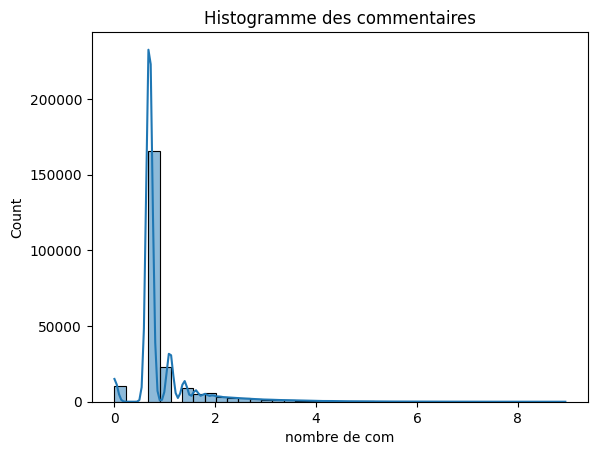

In [267]:
plt.figure()
sb.histplot(np.log(1+comment_count_per_user['comment_count']), kde=True, bins=40)
plt.title("Histogramme des commentaires")
plt.xlabel('nombre de com')
plt.show()
